In [1]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm

In [2]:
# load the gps coordinate data, using the date as the full set's index
# the data files are encoded as utf-8: specify so to prevent matplotlib from choking on diacritics
df = pd.read_csv("C:\PTUA\Lab06\summer-travel-gps-full.csv", encoding='utf-8', index_col='date', parse_dates=True)
rs = pd.read_csv("C:\PTUA\Lab06\summer-travel-gps-dbscan.csv", encoding='utf-8')

In [3]:
df.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [4]:
rs.head()

,lat,lon,date,city,country
0,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
1,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal
2,38.771939,-9.128911,05/14/2014 15:41,Lisbon,Portugal
3,38.742987,-9.147780,05/14/2014 16:11,Lisbon,Portugal
4,38.693780,-9.206363,05/15/2014 14:19,Lisbon,Portugal


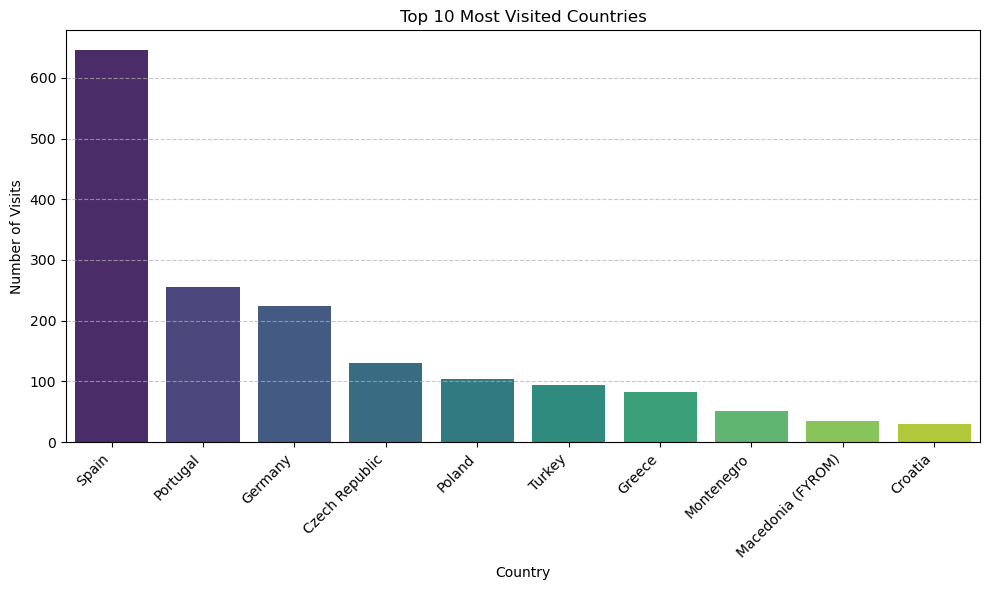

In [6]:
import seaborn as sns

# Group by country and count the number of occurrences
country_visits = df['country'].value_counts()

# Get the top 10 most visited countries
top_countries = country_visits.head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 Most Visited Countries')
plt.xlabel('Country')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

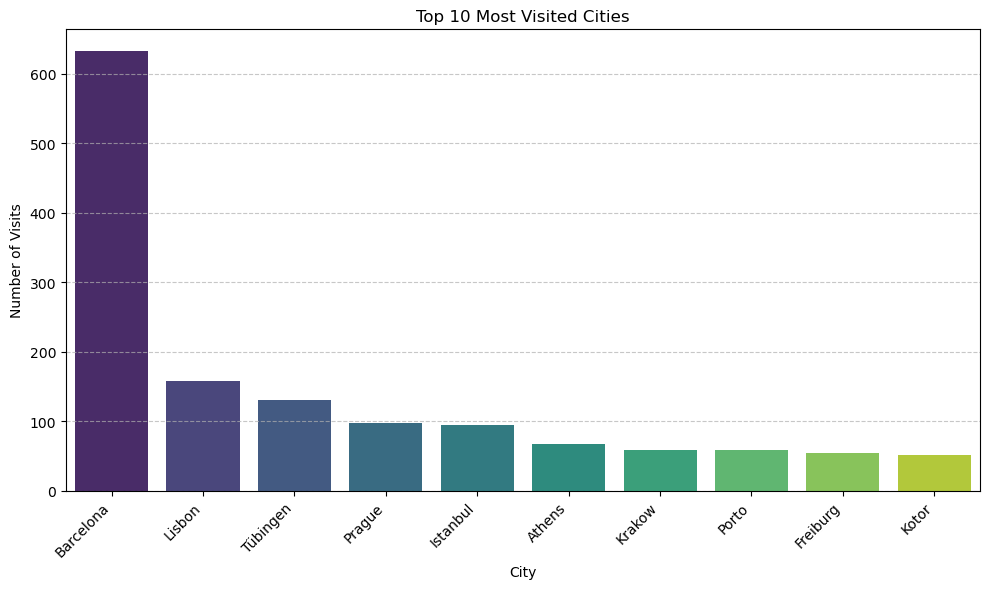

In [7]:
# Q2: Draw the same bar chart, but now for the most visited cities instead of countries
# Group by city and count the number of occurrences
city_visits = df['city'].value_counts()

# Get the top 10 most visited cities
top_cities = city_visits.head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')
plt.title('Top 10 Most Visited Cities')
plt.xlabel('City')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


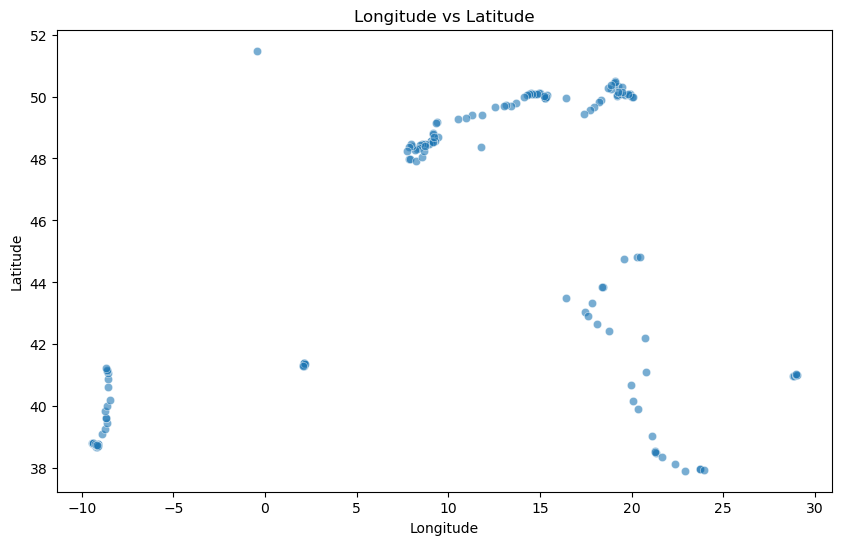

In [8]:
# Q3: Draw a scatter plot the longitude and latitude data, with matplotlib and seaborn defaults. 
# You can use the rs dataframe.
# Please style the chart to make it look nicer with good size and alpha settings. 

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lon', y='lat', data=rs, alpha=0.6)

# Title and labels
plt.title('Longitude vs Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


In [9]:
# get the count of records by date
countdata = df.groupby(df.index.date).size()
countdata.head()

2014-05-14    36
2014-05-15    61
2014-05-16    57
2014-05-17    64
2014-05-18    50
dtype: int64

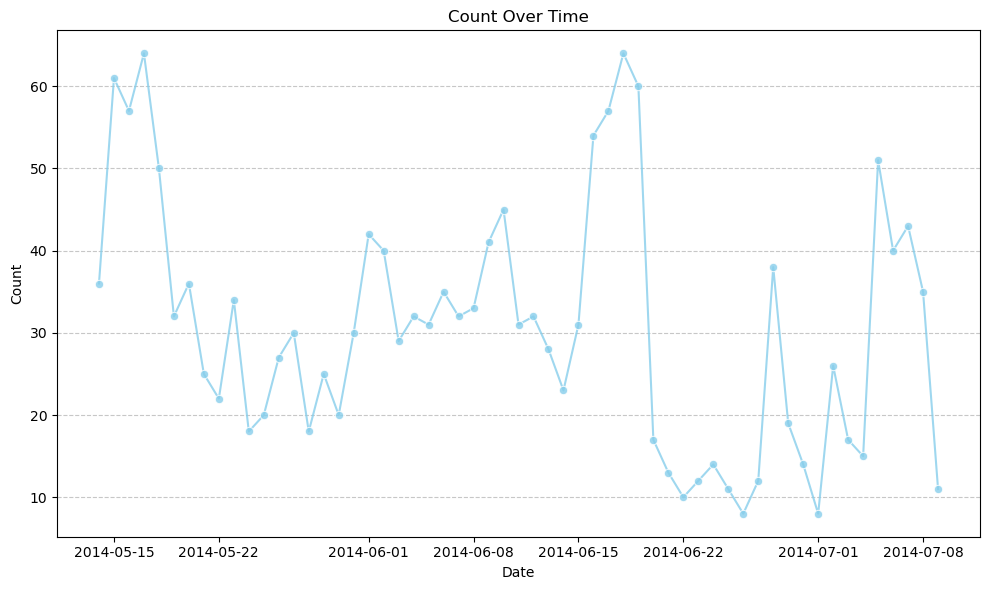

In [12]:
# Q4: Draw a  matplotlib and seaborn line chart from countdata. 
# Please style the chart to make it look nicer with good size and alpha settings. 
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot( data= countdata, marker='o', color='skyblue', alpha=0.8)

# Title and labels
plt.title('Count Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


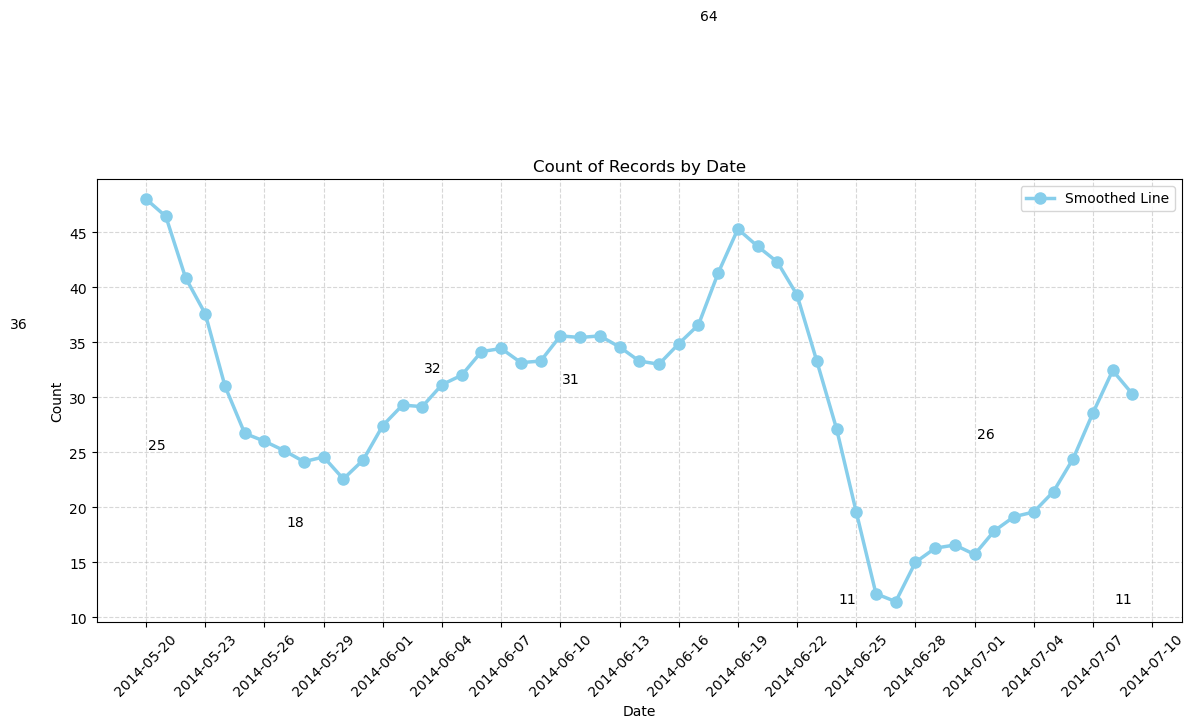

In [16]:
# Q5: Now you try: re-create the plot above with different line widths, colors, and point markers. 
# Play with moving the annotation labels around. Make the vertical tick marks 3 days apart instead of 5.
import matplotlib.pyplot as plt
import seaborn as sns


import matplotlib.dates as mdates

# Plotting
plt.figure(figsize=(12, 8))

# Smooth line
smooth_data = countdata.rolling(window=7).mean()  # Rolling mean for smoothing

# Line plot with smoothed data
plt.plot(countdata.index, smooth_data, color='skyblue', linewidth=2.5, marker='o', markersize=8, label='Smoothed Line')

# Annotation labels
for i, count in enumerate(countdata):
    if i % 7 == 0:  # Display annotation label every 7 days
        plt.text(countdata.index[i], count, str(count), ha='right', va='bottom', fontsize=10)

# Customizing ticks
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))  # Set vertical tick marks 3 days apart

# Other plot configurations
plt.title('Count of Records by Date')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

In [23]:
cities = df['city'].value_counts()
print(cities.count())
cities.head()


113


city
Barcelona    632
Lisbon       158
Tübingen     131
Prague        97
Istanbul      94
Name: count, dtype: int64

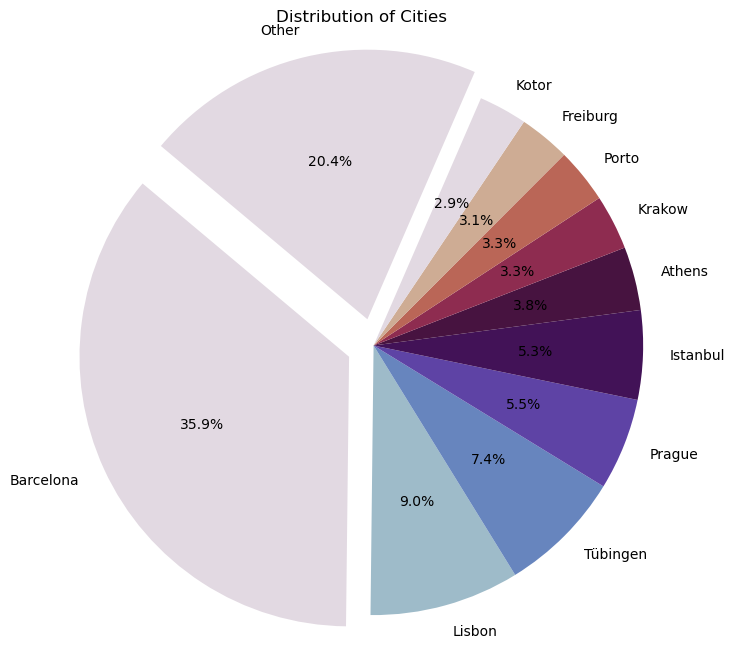

In [32]:
import matplotlib.pyplot as plt

# Assuming df['city'] contains the city data
cities = df['city'].value_counts()

# Combine less frequent cities into 'Other' category
top_cities = cities.head(10)
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1)  # Explode the 1st slice (i.e., 'explode' the most visited city)  
other_cities_count = cities.sum() - top_cities.sum()
top_cities['Other'] = other_cities_count

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(top_cities, labels=top_cities.index, autopct='%1.1f%%', startangle=140, colors = plt.cm.twilight(np.linspace(0, 1, 10)),explode=explode)
plt.title('Distribution of Cities')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
